<a href="https://colab.research.google.com/github/imyoungchae/Ai/blob/main/1201_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from pprint import pprint

# 이미지

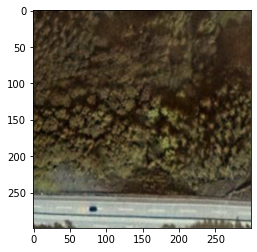

In [ ]:
img='/content/green_space_and_road_1.png'
img=cv2.imread(img)
plt.imshow(img)

# 이미지 탐색

In [ ]:
image_resized = cv2.resize(img, (299,299), fx=0.05, fy=0.05)

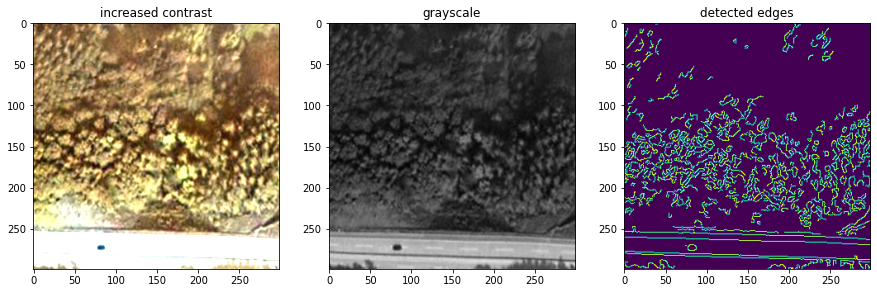

In [ ]:
contrast_img = cv2.addWeighted(image_resized, 2.5, np.zeros(image_resized.shape, image_resized.dtype), 0, 0)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

min_intensity_grad, max_intensity_grad = 100, 200
edge_img = cv2.Canny(image_resized, min_intensity_grad, max_intensity_grad)

fig, ax = plt.subplots(1,3, figsize=(15,20))
ax[0].imshow(contrast_img); ax[0].set_title('increased contrast')
ax[1].imshow(img_gray, cmap='gray', vmin = 0, vmax = 255); ax[1].set_title('grayscale')
ax[2].imshow(edge_img); ax[2].set_title('detected edges')
plt.show()

In [ ]:
from skimage import io, exposure, feature
from skimage.transform import rescale
from skimage.color import rgb2gray

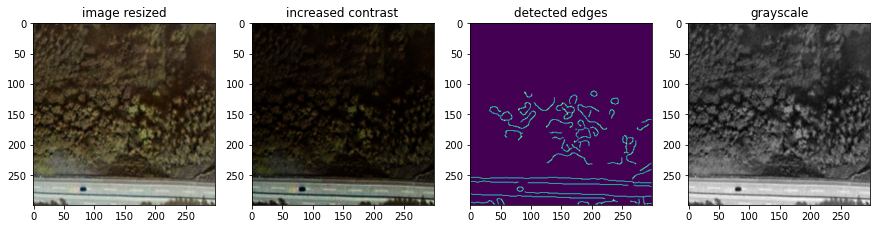

In [ ]:
increased_contrast = exposure.adjust_gamma(image_resized, 2)
img_gray = rgb2gray(image_resized)
edge_img = feature.canny(img_gray, sigma=3) # canny works only with grayscale images

fig, ax = plt.subplots(1,4, figsize=(15,20))
ax[0].imshow(image_resized); ax[0].set_title('image resized')
ax[1].imshow(increased_contrast); ax[1].set_title('increased contrast')
ax[2].imshow(edge_img); ax[2].set_title('detected edges')
ax[3].imshow(img_gray, cmap='gray'); ax[3].set_title('grayscale')
plt.show()

In [ ]:
img.shape

(299, 299, 3)

# 색상 채널 분석

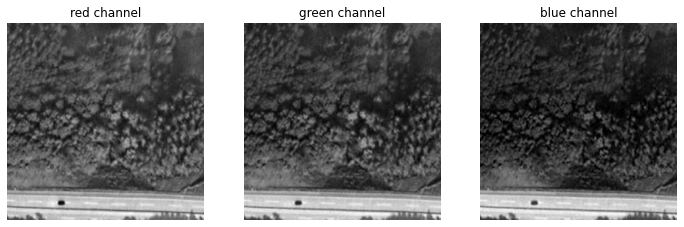

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(12,12))
colors = ['red', 'green', 'blue']
for i, ax in enumerate(axes):
    ax.imshow(img[:,:,i], cmap='gray')
    ax.set_title(colors[i]+' channel'), ax.axis('off')
plt.show()

In [ ]:
img_obj = imgs_object[0]
img_bck = imgs_backgr[0]

img_obj_channels = [img_obj[0], img_obj[1], img_obj[2]]
img_bck_channels = [img_bck[0], img_bck[1], img_bck[2]]